**1 . Import dataset from the table**

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:10<00:00, 275MB/s]
100% 1.98G/1.98G [00:10<00:00, 209MB/s]


**2 . Extract the zip file**

In [4]:
# extract the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**3 . Import required libarary**

In [5]:
# import required libarary
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

**3 . Load data in batch size using kerars image_dataset_from_directory function**

In [6]:
# Genrator use : beacuse the we can not load whole dataset we load dataset from batch
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',   # Path of the training data folder
    labels='inferred',      # How the labels are assigned
    label_mode = 'int',     # Format of the label
    batch_size=32,          # In one batch how many image
    image_size=(256,256)    # Image size : beacuse in datset not all the image are same size
)

# same process for the testing data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

'''Note : There are many parameters available in image_dataset_from_directory. Please check the Keras documentation.'''

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


'Note : There are many parameters available in image_dataset_from_directory. Please check the Keras documentation.'

**4 . Normalize the image pixel value**

In [7]:
def normalize_image(image,label):
  image = tf.cast(image/255. ,tf.float32) # do the type casting int32 or unit8 to tensor
  return image, label

#  .map() function is used to apply a transformation or function to each element of a dataset. Here's how it works in the context of your code
train_ds = train_ds.map(normalize_image)

**5 .Design the CNN Architecture**

In [8]:
model = Sequential()
# convolution -1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# pooling -1
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# convolution -2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# pooling -2
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# convolution -3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# pooling -3
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Add flatten layer
model.add(Flatten())

# Add dense layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(36,activation='softmax'))

# Print the model summary
model.summary()


# compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,572 (56.65 MB)

 Trainable params: 14,849,572 (56.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 656ms/step - accuracy: 0.0363 - loss: 3.6691 - val_accuracy: 0.1086 - val_loss: 132.2939
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 603ms/step - accuracy: 0.0902 - loss: 3.2919 - val_accuracy: 0.2173 - val_loss: 215.7464
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 626ms/step - accuracy: 0.1939 - loss: 2.7942 - val_accuracy: 0.3398 - val_loss: 201.6315
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 623ms/step - accuracy: 0.2796 - loss: 2.4474 - val_accuracy: 0.3649 - val_loss: 247.9360
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 600ms/step - accuracy: 0.3422 - loss: 2.2045 - val_accuracy: 0.4513 - val_loss: 185.5789
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 615ms/step - accuracy: 0.4268 - loss: 1.9640 - val_accuracy: 0.4513 - val_loss: 192.8536
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - accuracy: 0.5095 - loss: 1.6878 - val_accuracy: 0.5376 - val_loss: 186.8248
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 635ms/step - accuracy: 0.5718 - loss: 1.3

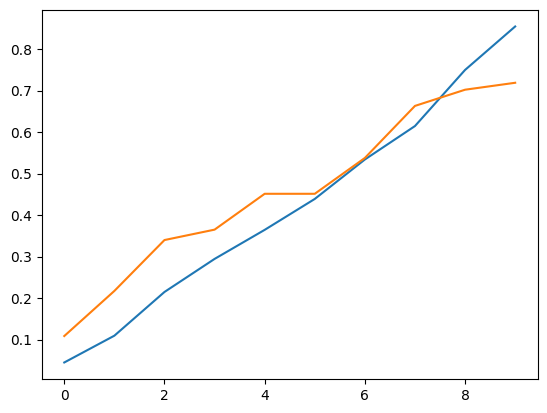

In [10]:
# plot the graph between train accuracy and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")

plt.show()